In [15]:
# importing the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

# Step 1 - Data collection

In [16]:
# loading the data to the pandas dataframe

wine_data = pd.read_csv('winequality-red.csv')

In [17]:
# no of rows and columns in the dataset
wine_data.shape

(1599, 12)

In [18]:
# first five rows of the dataset
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [19]:
# checking the missing values
# incase of missing we will drop the value from the table or for the mean of that table
wine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

 # Step 2 - Data analysing and visualization

In [20]:
# statisctical measures of the dataset
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


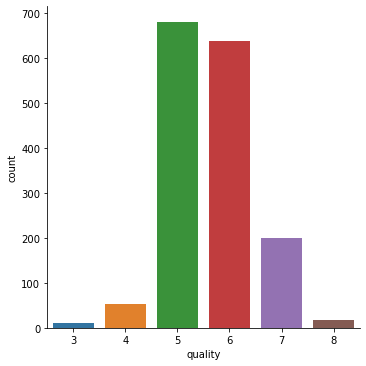

In [21]:
# no of the values for each quality using catplot()
sns.catplot(x ='quality',data =wine_data, kind ='count')

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

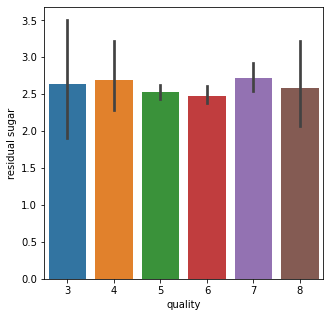

In [28]:
#residual sugar vs qualtiy using barplot()

plot = plt.figure(figsize=(5,5))
sns.barplot(x ='quality',y ='residual sugar',data =  wine_data)
# as we can see that upto some mark residual sugar has atmost impact on quality of wine

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

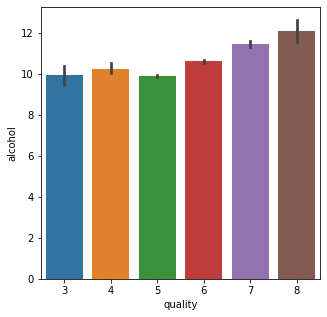

In [33]:
# alcohol vs quality using histplot()
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='alcohol',data=wine_data)

# correlation -1  - positive and negative
# positive - when both the value increases
# negative - when one value decreases and another increases

In [34]:
correlation = wine_data.corr()

<AxesSubplot:>

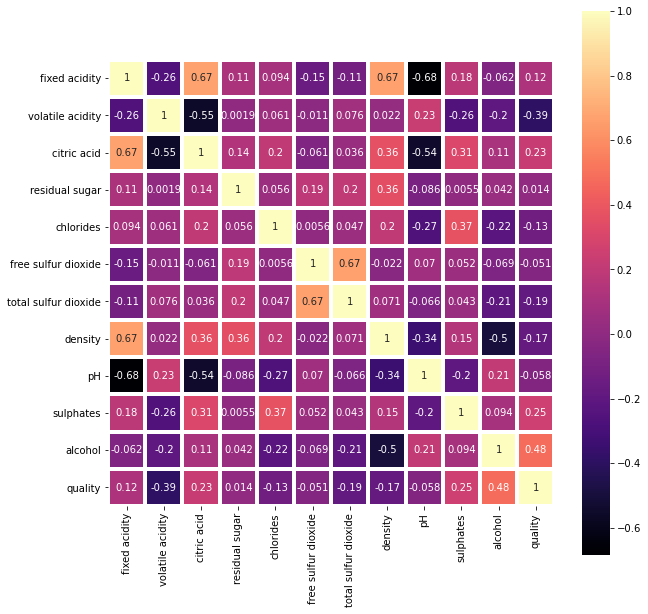

In [47]:
# constructing heatmap to find the correlation between the columns
plot = plt.figure(figsize=(10,10))
sns.heatmap(correlation,cmap='magma',annot=True,lw=3,square=True)


  # step 3 = Data preprocessing

In [48]:
# seperating the data and the label(quality)
x = wine_data.drop('quality',axis=1)

In [49]:
print(x)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

 # label binarization 

In [71]:
y = wine_data['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)
# here we have set the condition for y in terms of quality 
# random forest classifier - getting from two or more dataset and then getting final result

In [72]:
print(y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


# step 4- train test split for model

In [73]:
 x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=3)

In [74]:
print(y.shape,y_train.shape,y_test.shape)

(1599,) (1279,) (320,)


 # step 5 - random forest classifier - different dataset giving the final result at the last  ...training the model 

In [75]:
model = RandomForestClassifier()

In [76]:
model.fit(x_train,y_train)

RandomForestClassifier()

  # model evaluation - accuracy score 

In [77]:
# accuracy on the test data
x_test_prediction = model.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction,y_test)
# here y_test is a label value of x_test so we are predicting on its original  label

In [78]:
print('accuracy score : ', test_data_accuracy)

accuracy score :  0.934375


# building the predictive system

In [84]:
input_data = (7.7,0.51,0.28,2.1,0.087,23.0,54.0,0.998,3.42,0.74,9.2)

# changing the input data to numpy array

input_data_as_numpy_array = np.asarray(input_data)

# reshaping the data as we are predicting for only one instance

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)

if prediction[0]==1:
    print('good quality wine')
else:
    print(' bad quality wine')

 bad quality wine
